In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
file_path = '/kaggle/input/amazon-data/student_resource/dataset/train.csv'
try:
    df = pd.read_csv(file_path)
    print(df.head())
    df.info()
    
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")

   sample_id                                    catalog_content  \
0      33127  Item Name: La Victoria Green Taco Sauce Mild, ...   
1     198967  Item Name: Salerno Cookies, The Original Butte...   
2     261251  Item Name: Bear Creek Hearty Soup Bowl, Creamy...   
3      55858  Item Name: Judee’s Blue Cheese Powder 11.25 oz...   
4     292686  Item Name: kedem Sherry Cooking Wine, 12.7 Oun...   

                                          image_link  price  
0  https://m.media-amazon.com/images/I/51mo8htwTH...   4.89  
1  https://m.media-amazon.com/images/I/71YtriIHAA...  13.12  
2  https://m.media-amazon.com/images/I/51+PFEe-w-...   1.97  
3  https://m.media-amazon.com/images/I/41mu0HAToD...  30.34  
4  https://m.media-amazon.com/images/I/41sA037+Qv...  66.49  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sample_id        750

In [6]:
print(df.loc[0, 'catalog_content'])

Item Name: La Victoria Green Taco Sauce Mild, 12 Ounce (Pack of 6)
Value: 72.0
Unit: Fl Oz



In [4]:
print(df.loc[1, 'catalog_content'])

Item Name: Salerno Cookies, The Original Butter Cookies, 8 Ounce (Pack of 4)
Bullet Point 1: Original Butter Cookies: Classic butter cookies made with real butter
Bullet Point 2: Variety Pack: Includes 4 boxes with 32 cookies total
Bullet Point 3: Occasion Perfect: Delicious cookies for birthdays, weddings, anniversaries
Bullet Point 4: Shareable Treats: Fun to give and enjoy with friends and family
Bullet Point 5: Salerno Brand: Trusted brand of delicious butter cookies since 1925
Value: 32.0
Unit: Ounce



In [9]:
import re
import numpy as np

def extract_info(text_block):
    value = np.nan
    unit = None
    if not isinstance(text_block, str):
        return pd.Series([value, unit])
    value_match = re.search(r"Value:\s*([\d.]+)", text_block)
    if value_match:
        try:
            value = float(value_match.group(1))
        except ValueError:
            value = np.nan 
    unit_match = re.search(r"Unit:\s*(\w+)", text_block)
    if unit_match:
        unit = unit_match.group(1)

    return pd.Series([value, unit])

df[['Extracted_Value', 'Extracted_Unit']] = df['catalog_content'].apply(extract_info)

print(df[['catalog_content', 'Extracted_Value', 'Extracted_Unit']].head())

unit_counts = df['Extracted_Unit'].value_counts(dropna=False)
print(unit_counts)


                                     catalog_content  Extracted_Value  \
0  Item Name: La Victoria Green Taco Sauce Mild, ...            72.00   
1  Item Name: Salerno Cookies, The Original Butte...            32.00   
2  Item Name: Bear Creek Hearty Soup Bowl, Creamy...            11.40   
3  Item Name: Judee’s Blue Cheese Powder 11.25 oz...            11.25   
4  Item Name: kedem Sherry Cooking Wine, 12.7 Oun...            12.00   

  Extracted_Unit  
0             Fl  
1          Ounce  
2          Ounce  
3          Ounce  
4          Count  
Extracted_Unit
Ounce     40982
Count     17452
Fl        11109
ounce      1960
oz          962
          ...  
in            1
Bucket        1
sq            1
8             1
7             1
Name: count, Length: 83, dtype: int64


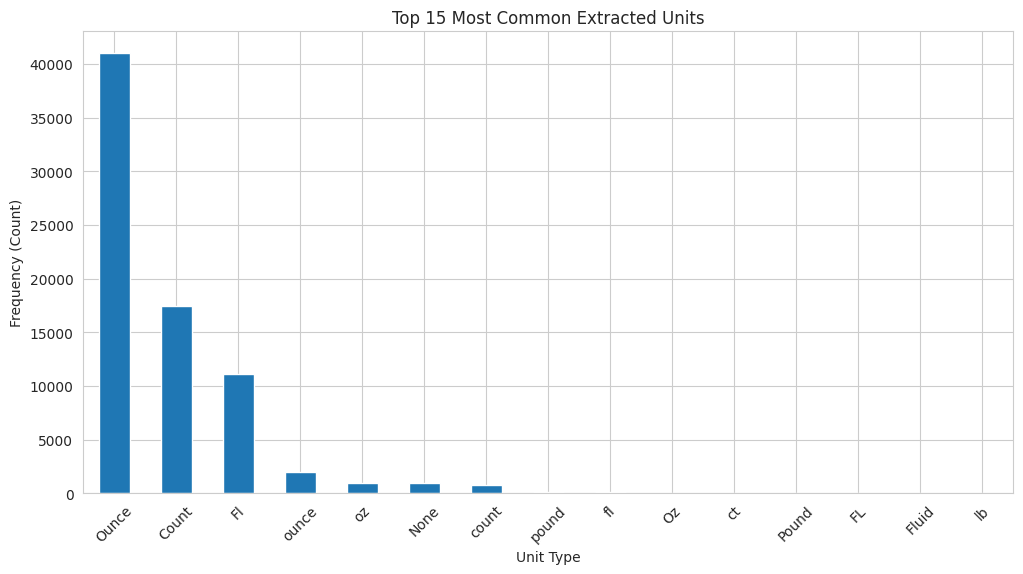

In [11]:
plt.figure(figsize=(12, 6))
unit_counts.head(15).plot(kind='bar')
plt.title('Top 15 Most Common Extracted Units')
plt.xlabel('Unit Type')
plt.ylabel('Frequency (Count)')
plt.xticks(rotation=45)
plt.show()

In [13]:
all_units = df['Extracted_Unit'].str.lower().unique()
print(all_units)
print(df['Extracted_Unit'].str.lower().value_counts(dropna=False))

['fl' 'ounce' 'count' 'none' 'fluid' 'oz' 'ounces' 'pound' 'gram' 'grams'
 'lb' 'each' 'liters' 'gramm' 'ct' 'millilitre' 'jar' 'bottle' 'can' 'tea'
 '20' '24' 'pack' 'piece' 'gr' 'milliliter' 'mililitro' '2' 'pounds' 'kg'
 'bag' 'in' 'k' 'sq' nan 'ml' 'packs' 'box' '8' 'pouch' 'bucket' 'per' '1'
 'comes' 'units' 'case' 'product_weight' 'foot' 'cm' 'unità' 'paper'
 'capsule' 'bottles' 'ziplock' 'ltr' 'carton' '7']
Extracted_Unit
ounce             42942
count             18209
fl                11281
oz                 1064
none                940
pound               202
fluid                53
ct                   49
gram                 39
lb                   34
each                 26
ounces               20
packs                12
pack                  9
millilitre            9
bottle                9
liters                7
per                   6
gramm                 6
can                   6
bag                   6
kg                    6
pounds                4
grams          

In [15]:
import numpy as np

unit_map = {
    # --- Weight ---
    'ounce': 'ounce',
    'oz': 'ounce',
    'ounces': 'ounce',
    'pound': 'pound',
    'lb': 'pound',
    'pounds': 'pound',
    'gram': 'gram',
    'grams': 'gram',
    'gramm': 'gram',
    'gr': 'gram',
    'kg': 'kilogram',
    'k': 'kilogram',

    # --- Volume ---
    'fl': 'fluid_ounce',
    'fluid': 'fluid_ounce',
    'fl oz': 'fluid_ounce',
    'fluid ounce': 'fluid_ounce',
    'liter': 'liter',
    'liters': 'liter',
    'ltr': 'liter',
    'milliliter': 'milliliter',
    'ml': 'milliliter',
    'millilitre': 'milliliter',
    'mililitro': 'milliliter',

    # --- Count (Individual Items) ---
    'count': 'count',
    'ct': 'count',
    'each': 'count',
    'individual': 'count',
    'pack': 'count',
    'packs': 'count',
    'piece': 'count',
    'jar': 'count',
    'bottle': 'count',
    'bottles': 'count',
    'can': 'count',
    'bag': 'count',
    'box': 'count',
    'pouch': 'count',
    'bucket': 'count',
    'case': 'count',
    'units': 'count',
    'capsule': 'count',
    'carton': 'count',
    'ziplock': 'count',
    'unità': 'count', 

    # --- Length/Area ---
    'foot': 'foot',
    'in': 'inch',
    'cm': 'centimeter',
    'sq': 'square_unit',

    # --- Null/None Values ---
    'none': np.nan,
    'nan': np.nan,
}

df['Standardized_Unit'] = df['Extracted_Unit'].str.lower().map(unit_map)

print(df['Standardized_Unit'].value_counts(dropna=False))

unmapped_units = df[df['Standardized_Unit'].isnull()]['Extracted_Unit'].value_counts()
if unmapped_units.empty:
    print("All units were successfully mapped")
else:
    print(unmapped_units)

Standardized_Unit
ounce          44026
count          18346
fluid_ounce    11334
NaN              965
pound            240
gram              51
milliliter        15
kilogram           9
liter              8
square_unit        2
foot               2
inch               1
centimeter         1
Name: count, dtype: int64
Extracted_Unit
None              940
per                 5
1                   3
Tea                 2
2                   2
product_weight      2
Paper               2
20                  1
24                  1
8                   1
Per                 1
Comes               1
7                   1
Name: count, dtype: int64


In [ ]:
PRICE_COL = 'PRICE' 

# 1. Check for missing prices
print(f"--- Price Column: '{PRICE_COL}' ---")
print(f"Missing (null) prices: {df[PRICE_COL].isnull().sum()}")

# 2. Get the core descriptive statistics
print("\n--- Descriptive Statistics for Price ---")
print(df[PRICE_COL].describe())

In [16]:

PRICE_COL = 'price' 
print(f"--- Price Column: '{PRICE_COL}' ---")
print(f"Missing (null) prices: {df[PRICE_COL].isnull().sum()}")
print(df[PRICE_COL].describe())

--- Price Column: 'price' ---
Missing (null) prices: 0
count    75000.000000
mean        23.647654
std         33.376932
min          0.130000
25%          6.795000
50%         14.000000
75%         28.625000
max       2796.000000
Name: price, dtype: float64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


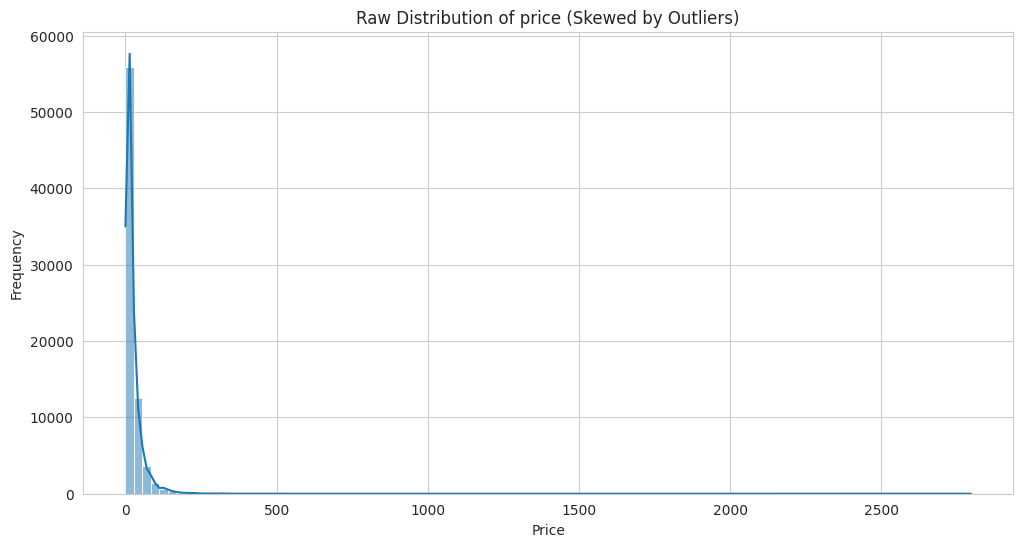

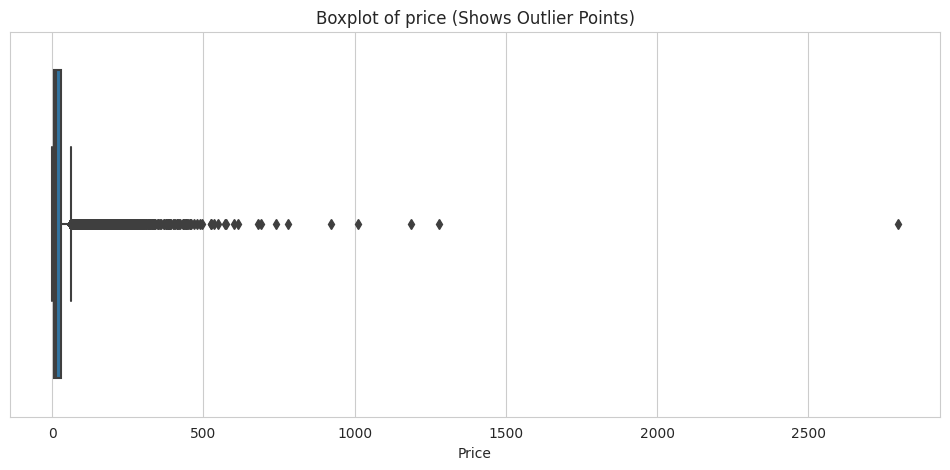

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


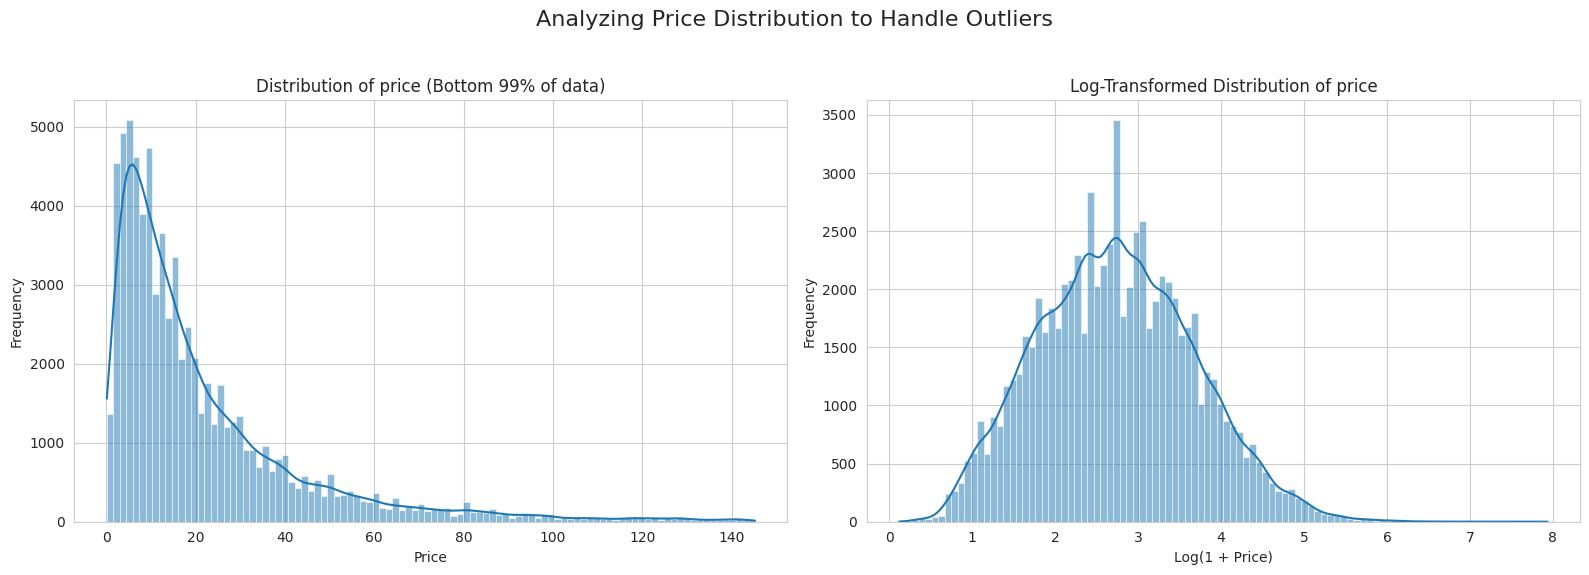

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style('whitegrid')
PRICE_COL = 'price' 

plt.figure(figsize=(12, 6))
sns.histplot(df[PRICE_COL].dropna(), bins=100, kde=True)
plt.title(f'Raw Distribution of {PRICE_COL} (Skewed by Outliers)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.savefig('raw_price_distribution.png')
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x=df[PRICE_COL].dropna())
plt.title(f'Boxplot of {PRICE_COL} (Shows Outlier Points)')
plt.xlabel('Price')
plt.savefig('price_boxplot_outliers.png')
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

p_99 = df[PRICE_COL].quantile(0.99)
sns.histplot(df[df[PRICE_COL] < p_99][PRICE_COL].dropna(), bins=100, kde=True, ax=axes[0])
axes[0].set_title(f'Distribution of {PRICE_COL} (Bottom 99% of data)')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

sns.histplot(np.log1p(df[PRICE_COL].dropna()), bins=100, kde=True, ax=axes[1])
axes[1].set_title(f'Log-Transformed Distribution of {PRICE_COL}')
axes[1].set_xlabel('Log(1 + Price)')
axes[1].set_ylabel('Frequency')

plt.suptitle('Analyzing Price Distribution to Handle Outliers', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('normalized_price_plots.png')
plt.show()

In [18]:
import numpy as np

price_bins = [
    0, 10, 20, 30, 40, 50,  
    100,                    
    250,                     
    500,                    
    np.inf                   
]

df['price_bin'] = pd.cut(df[PRICE_COL], bins=price_bins, right=False) 
print("\n--- Count of Items per Price Range ---")
bin_counts = df['price_bin'].value_counts().sort_index()
print(bin_counts)

print("\n--- Percentage of Items per Price Range ---")
bin_percentages = (df['price_bin'].value_counts(normalize=True).sort_index() * 100).round(2)
print(bin_percentages)


--- Count of Items per Price Range ---
price_bin
[0.0, 10.0)       28512
[10.0, 20.0)      19357
[20.0, 30.0)       9907
[30.0, 40.0)       5870
[40.0, 50.0)       3246
[50.0, 100.0)      6215
[100.0, 250.0)     1741
[250.0, 500.0)      135
[500.0, inf)         17
Name: count, dtype: int64

--- Percentage of Items per Price Range ---
price_bin
[0.0, 10.0)       38.02
[10.0, 20.0)      25.81
[20.0, 30.0)      13.21
[30.0, 40.0)       7.83
[40.0, 50.0)       4.33
[50.0, 100.0)      8.29
[100.0, 250.0)     2.32
[250.0, 500.0)     0.18
[500.0, inf)       0.02
Name: proportion, dtype: float64


In [19]:
import numpy as np

def convert_to_base_unit(row):
    unit = row['Standardized_Unit']
    value = row['Extracted_Value']
    if pd.isna(unit) or pd.isna(value) or value == 0:
        return pd.Series([np.nan, np.nan])
    if unit == 'gram':
        return pd.Series([value, 'gram'])
    if unit == 'kilogram':
        return pd.Series([value * 1000, 'gram'])
    if unit == 'pound':
        return pd.Series([value * 453.592, 'gram'])
    if unit == 'ounce': # This is weight, not fluid ounce
        return pd.Series([value * 28.3495, 'gram'])
    if unit == 'milliliter':
        return pd.Series([value, 'milliliter'])
    if unit == 'liter':
        return pd.Series([value * 1000, 'milliliter'])
    if unit == 'fluid_ounce':
        return pd.Series([value * 29.5735, 'milliliter'])
    if unit == 'count':
        return pd.Series([value, 'count'])
    if unit == 'centimeter':
        return pd.Series([value, 'centimeter'])
    if unit == 'inch':
        return pd.Series([value * 2.54, 'centimeter'])
    if unit == 'foot':
        return pd.Series([value * 30.48, 'centimeter'])
    return pd.Series([np.nan, np.nan])

df[['Base_Value', 'Base_Unit']] = df.apply(convert_to_base_unit, axis=1)

df['price_per_base_unit'] = df['price'] / df['Base_Value']

print(df[['price', 'Extracted_Value', 'Standardized_Unit', 'Base_Value', 'Base_Unit', 'price_per_base_unit']].head(10))

   price  Extracted_Value Standardized_Unit   Base_Value   Base_Unit  \
0   4.89            72.00       fluid_ounce  2129.292000  milliliter   
1  13.12            32.00             ounce   907.184000        gram   
2   1.97            11.40             ounce   323.184300        gram   
3  30.34            11.25             ounce   318.931875        gram   
4  66.49            12.00             count    12.000000       count   
5  18.50             6.25             ounce   177.184375        gram   
6   5.99           180.00             ounce  5102.910000        gram   
7  94.00             1.00             count     1.000000       count   
8  35.74           192.00       fluid_ounce  5678.112000  milliliter   
9  31.80             9.00             ounce   255.145500        gram   

   price_per_base_unit  
0             0.002297  
1             0.014462  
2             0.006096  
3             0.095130  
4             5.540833  
5             0.104411  
6             0.001174  
7      

In [21]:

print(df.groupby('Base_Unit')['price_per_base_unit'].describe())

              count       mean        std       min       25%       50%  \
Base_Unit                                                                 
centimeter      4.0   2.344126   0.910819  1.320833  1.994128  2.259134   
count       18315.0  11.096299  32.666266  0.001719  0.501667  1.875000   
gram        44321.0   0.113175   1.329080  0.000006  0.011080  0.027744   
milliliter  11355.0   0.078756   1.304081  0.000008  0.003823  0.010834   

                  75%          max  
Base_Unit                           
centimeter   2.609132     3.537402  
count       10.950000  2796.000000  
gram         0.063160   145.862448  
milliliter   0.033792   133.741356  


In [32]:
import numpy as np
import pandas as pd

units_to_analyze = ['gram', 'milliliter', 'count']

bin_map = {
    'gram': [0, 0.05, 0.10, 0.25, 0.50, 1.0, 1.5, 5, np.inf],
    'milliliter': [0, 0.02, 0.05, 0.10, 0.20, 0.50, 1.5, np.inf],
    'count': [0, 1, 5, 10, 25, 50, 100, 200, np.inf]
}

for unit in units_to_analyze:
    if unit not in bin_map:
        continue
        
    print(f"\n" + "="*50)
    print(f"--- Binned Analysis for: Price per {unit.upper()} ---")
    print("="*50)
    
    unit_df = df[df['Base_Unit'] == unit].copy()
    price_bins = bin_map[unit]
    unit_df['price_bin'] = pd.cut(unit_df['price_per_base_unit'], bins=price_bins, right=False)
    bin_counts = unit_df['price_bin'].value_counts().sort_index()
    print(bin_counts)
    bin_percentages = (unit_df['price_bin'].value_counts(normalize=True).sort_index() * 100).round(2)
    print(bin_percentages)


--- Binned Analysis for: Price per GRAM ---
price_bin
[0.0, 0.05)    30600
[0.05, 0.1)     6449
[0.1, 0.25)     4986
[0.25, 0.5)     1226
[0.5, 1.0)       573
[1.0, 1.5)       160
[1.5, 5.0)       232
[5.0, inf)        95
Name: count, dtype: int64
price_bin
[0.0, 0.05)    69.04
[0.05, 0.1)    14.55
[0.1, 0.25)    11.25
[0.25, 0.5)     2.77
[0.5, 1.0)      1.29
[1.0, 1.5)      0.36
[1.5, 5.0)      0.52
[5.0, inf)      0.21
Name: proportion, dtype: float64

--- Binned Analysis for: Price per MILLILITER ---
price_bin
[0.0, 0.02)     7275
[0.02, 0.05)    1958
[0.05, 0.1)      908
[0.1, 0.2)       550
[0.2, 0.5)       408
[0.5, 1.5)       190
[1.5, inf)        66
Name: count, dtype: int64
price_bin
[0.0, 0.02)     64.07
[0.02, 0.05)    17.24
[0.05, 0.1)      8.00
[0.1, 0.2)       4.84
[0.2, 0.5)       3.59
[0.5, 1.5)       1.67
[1.5, inf)       0.58
Name: proportion, dtype: float64

--- Binned Analysis for: Price per COUNT ---
price_bin
[0.0, 1.0)        7624
[1.0, 5.0)        3831
[5.0, 1



--- Generating Raw vs. Log-Normalized Graphs ---


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

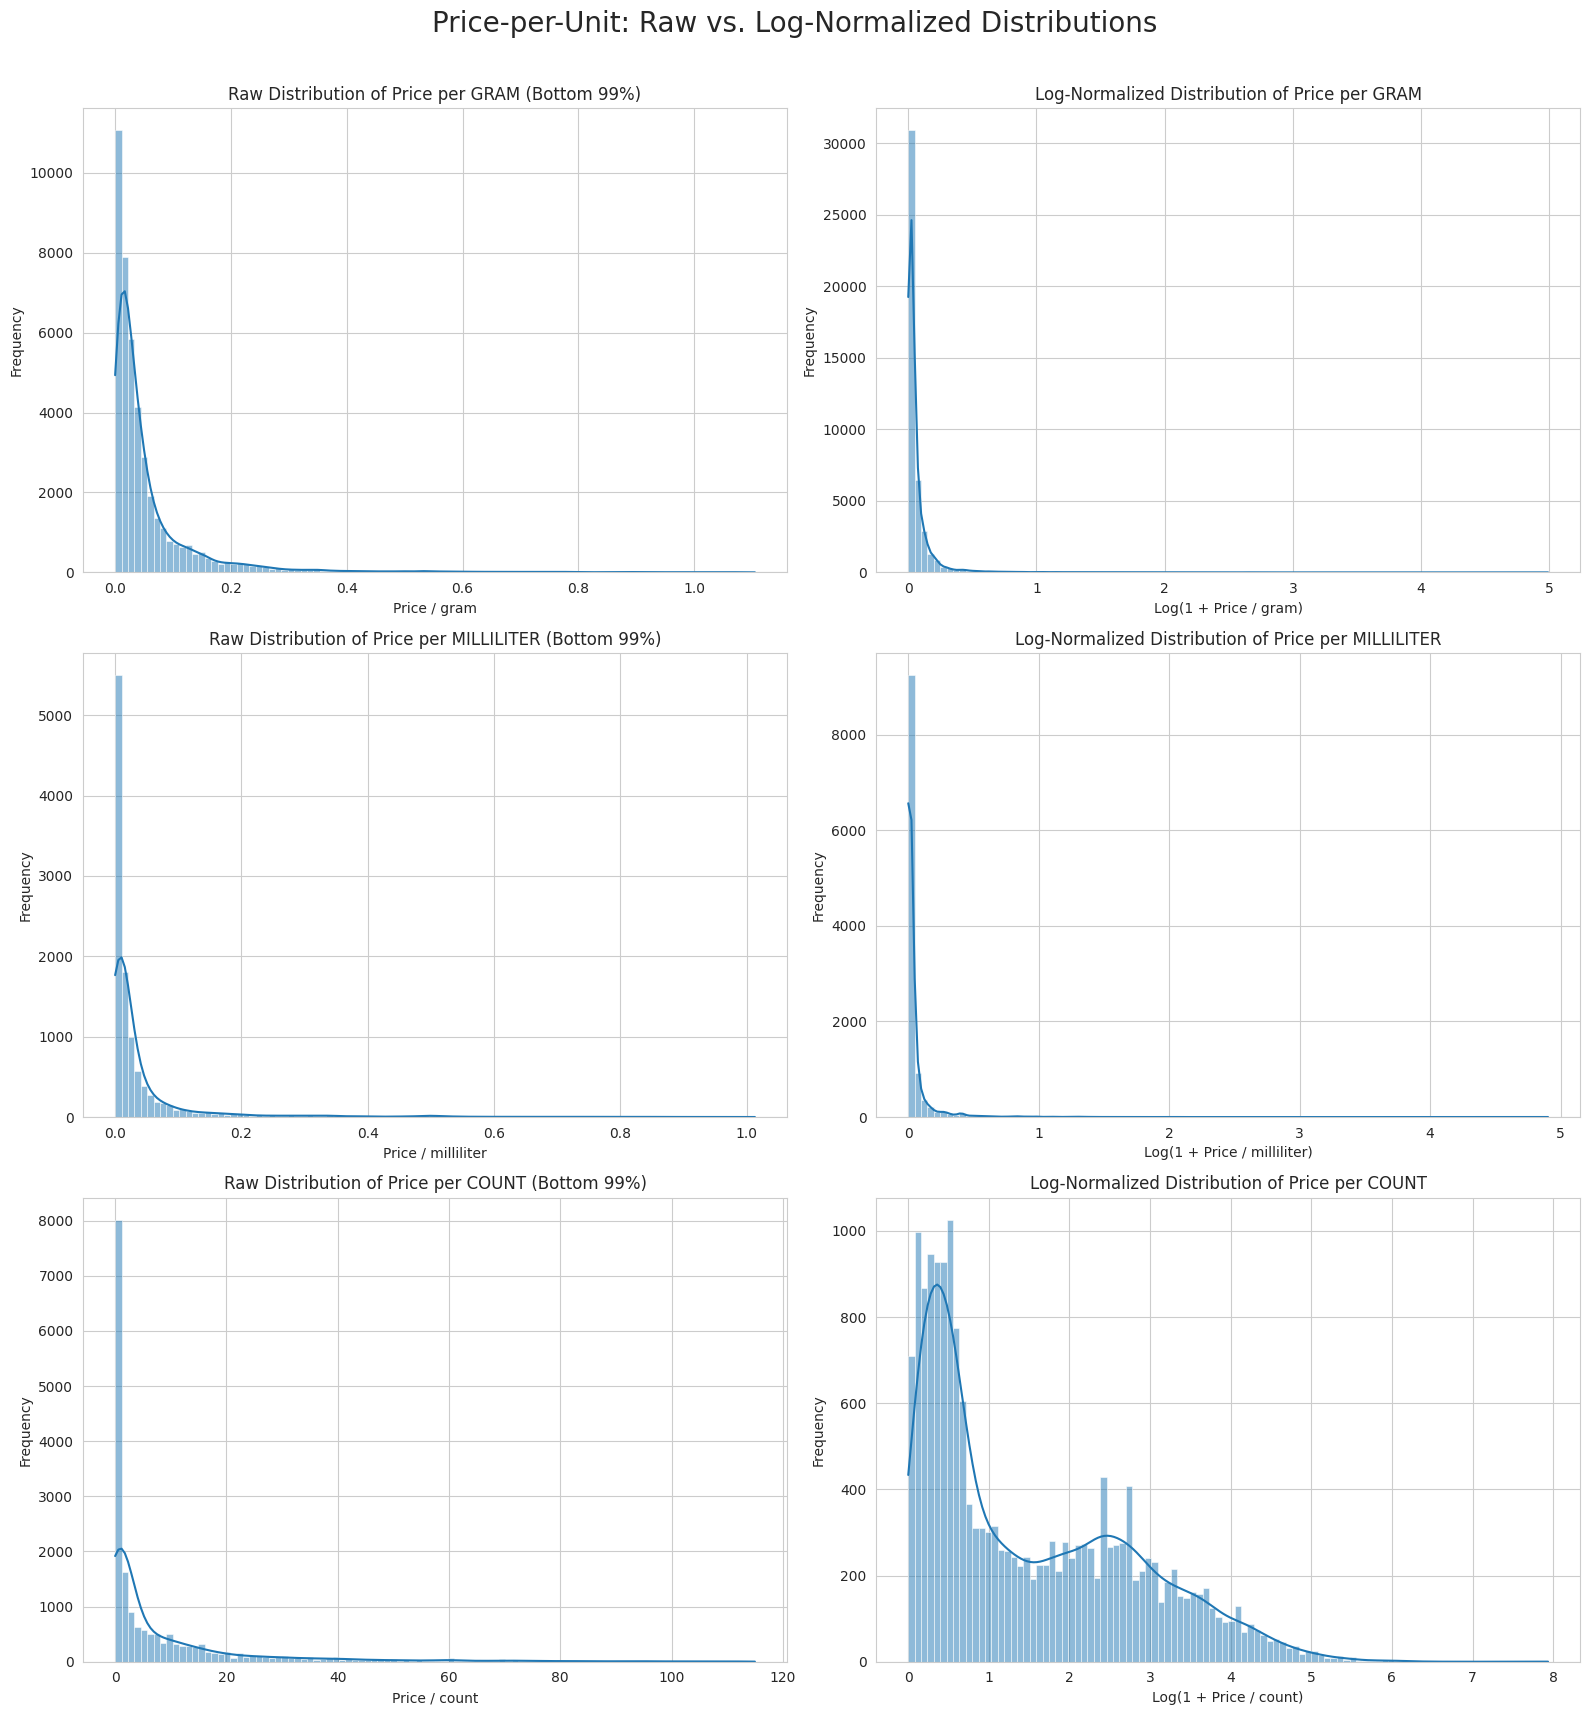

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("\n\n" + "="*50)
print("--- Generating Raw vs. Log-Normalized Graphs ---")
print("="*50)

units_to_plot = ['gram', 'milliliter', 'count']
num_units = len(units_to_plot)

# Create a grid of subplots
fig, axes = plt.subplots(num_units, 2, figsize=(16, 6 * num_units))

for i, unit in enumerate(units_to_plot):
    
    # Get the data for this unit and drop NAs/Infs
    data = df[df['Base_Unit'] == unit]['price_per_base_unit'].replace([np.inf, -np.inf], np.nan).dropna()
    
    # --- Plot 1: Raw Distribution (Clipped at 99th percentile for visibility) ---
    p_99 = data.quantile(0.99)
    data_clipped = data[data < p_99]
    
    sns.histplot(data_clipped, bins=100, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Raw Distribution of Price per {unit.upper()} (Bottom 99%)')
    axes[i, 0].set_xlabel(f'Price / {unit}')
    axes[i, 0].set_ylabel('Frequency')

    # --- Plot 2: Log-Normalized Distribution (This is the "fixed" version) ---
    sns.histplot(np.log1p(data), bins=100, kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Log-Normalized Distribution of Price per {unit.upper()}')
    axes[i, 1].set_xlabel(f'Log(1 + Price / {unit})')
    axes[i, 1].set_ylabel('Frequency')

plt.suptitle('Price-per-Unit: Raw vs. Log-Normalized Distributions', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.savefig('price_per_unit_distributions.png')
plt.show()

In [33]:
import re
import numpy as np
import pandas as pd

def extract_item_name(text_block):
    if not isinstance(text_block, str):
        return None
    
    name_match = re.search(r"Item Name:\s*(.*?)\n", text_block)
    if name_match:
        return name_match.group(1).strip()
    
    return None

df['Item_Name'] = df['catalog_content'].apply(extract_item_name)

print("--- Item_Name extraction complete. Verifying first 5 rows: ---")
print(df['Item_Name'].head())

--- Item_Name extraction complete. Verifying first 5 rows: ---
0    La Victoria Green Taco Sauce Mild, 12 Ounce (P...
1    Salerno Cookies, The Original Butter Cookies, ...
2    Bear Creek Hearty Soup Bowl, Creamy Chicken wi...
3    Judee’s Blue Cheese Powder 11.25 oz - Gluten-F...
4    kedem Sherry Cooking Wine, 12.7 Ounce - 12 per...
Name: Item_Name, dtype: object


In [36]:
print("\n" + "="*50)
print("--- Outlier Items: Price per GRAM (>= 5.0) ---")
print("="*50)

gram_outliers = df[
    (df['Base_Unit'] == 'gram') & 
    (df['price_per_base_unit'] >= 5.0)
]
print(gram_outliers[['Item_Name', 'price_per_base_unit']].sort_values(by='price_per_base_unit', ascending=False).head(10))


print("\n" + "="*50)
print("--- Outlier Items: Price per MILLILITER (>= 10) ---")
print("="*50)

ml_outliers = df[
    (df['Base_Unit'] == 'milliliter') & 
    (df['price_per_base_unit'] >= 10)
]
print(ml_outliers[['Item_Name', 'price_per_base_unit']].sort_values(by='price_per_base_unit', ascending=False).head(10))


print("\n" + "="*50)
print("--- Outlier Items: Price per COUNT (>= 200.0) ---")
print("="*50)

count_outliers = df[
    (df['Base_Unit'] == 'count') & 
    (df['price_per_base_unit'] >= 200.0)
]
print(count_outliers[['Item_Name', 'price_per_base_unit']].sort_values(by='price_per_base_unit', ascending=False).head(10))


--- Outlier Items: Price per GRAM (>= 5.0) ---
                                               Item_Name  price_per_base_unit
31030   Generic M.adhava Avocado Oil 1 liter (Pack of 6)           145.862448
39598  Black Radiance Precision Brow Sculptor, Blacki...           124.333333
32873  Maybelline Master Precise Skinny Gel Eyeliner ...            95.642906
29263  500 Qwik Stiks Sugar-Free Electrolyte Powdered...            82.557172
9501   Coffee Creamer Portion 2.8g Packet Single Serv...            57.795077
52710  Checolines Forritos Chilarines Tamarindo Confi...            37.922038
38353  Frontier Co-op Organic Saffron Threads, 0.01 O...            35.705117
71107  Maybelline Color Sensational Shaping Lip Liner...            32.240428
13420  Maybelline Color Sensational Shaping Lip Liner...            30.494365
51097  Maybelline Color Sensational Shaping Lip Liner...            29.947618

--- Outlier Items: Price per MILLILITER (>= 10) ---
                                         

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
